<a href="https://colab.research.google.com/github/possomartin/Notebooks/blob/main/elementary_cellular_automata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#UDLA
#ISWZ3401-2626_2627-INTELIGENCIA ARTIFICIAL I


---


# Integrantes

* Kevin Coloma
* Fernando Orbe
* Martin Posso


---

# Elementary cellular automata

The simplest class of one-dimensional cellular automata, the elementary cellular automata, have two possible values for each cell (0 or 1), and rules that depend only on nearest neighbor values.

![](https://natureofcode.com/book/imgs/chapter07/ch07_03.png)

As a result, the evolution of an elementary cellular automaton can completely be described by a table specifying the state a given cell will have in the next generation based on the value of the cell to its left, the value the cell itself, and the value of the cell to its right.

![](https://natureofcode.com/book/imgs/chapter07/ch07_04.png)

Since there are $2\times2\times2=2^3=8$ possible binary states for the three cells neighboring a given cell, there are a total of $2^8=256$ elementary cellular automata, each of which can be indexed with an 8-bit binary number (Wolfram 1983, 2002).

For example, the table giving the evolution of rule 90 is illustrated below. In this diagram, the possible values of the three neighboring cells are shown in the top row of each panel, and the resulting value the central cell takes in the next generation is shown below. ￼

![](https://natureofcode.com/book/imgs/chapter07/ch07_11.png)

Generations of the elementary cellular automata for rule 90 is:

![](https://natureofcode.com/book/imgs/chapter07/ch07_12.png)

- **Note:** mind on how you start the automata (initial state), and what to do with the borders.

### Resources

- https://mathworld.wolfram.com/ElementaryCellularAutomaton.html
- https://natureofcode.com/book/chapter-7-cellular-automata/

## Implement an elementary cellular autamata:

![](https://mathworld.wolfram.com/images/eps-gif/ElementaryCA_850.gif)

### Trabajo Autónomo:

1. Cuando el CA llegue a la parte inferior de la ventana de procesamiento, el CA comienza de nuevo con un nuevo conjunto de reglas al azar.
2. Examine lo que ocurre si se inicializa la primera generación, con cada célula en un estado aleatorio.
3. Visualice el CA de una manera no tradicional. Rompa todas las reglas que pueda; no se sienta atado a la utilización de los lugares en una cuadrícula perfecta con blanco y negro.
4. Crear una visualización del CA que se desplaza hacia arriba, con el aumento generaciones, para que pueda ver las generaciones de forma "infinita". Sugerencia: en lugar de hacer el seguimiento de sólo una generación a la vez, tendrá que almacenar un historial de las generaciones, siempre añadiendo una nueva y eliminar la más antigua de cada fotograma.
5. Cierre los bordes del autómata celular.

In [ ]:
#IMPORTS
import random as rand
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

In [ ]:
# FUNCTIONS DECLARATIONS

def rule_to_binary(rule):
    return bin(rule)[2:].rjust(8, '0')[::-1]  # reversed binary rule

def get_neighborhood(CA, cell_i):
    return ''.join(CA[cell_i-1:cell_i+2].astype('str'))

def update_automata(CA, binary_rule):
    CAU = CA.copy()  # CAU, state in t+1
    for cell_i in range(1, len(CA)-1):
        CAU[cell_i] = binary_rule[int(get_neighborhood(CA, cell_i), 2)]

    return CAU

def wolfram_initialization(size):
    CA = np.zeros(size, dtype='int')
    CA[len(CA)//2] = 1
    return CA

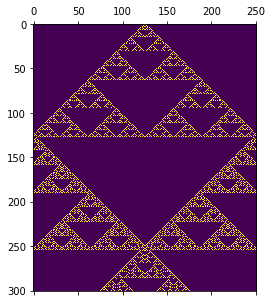

In [ ]:

size = 251  # size of the automata
steps = 300  # time steps
#randomNumber = rand.randint(0, 256)
#print(randomNumber)
#rule = randomNumber  # decimal rule
rule = 90
binary_rule = rule_to_binary(rule)
CA = [wolfram_initialization(size)]  # state in time 0

# Evolve the automata for t steps
for t in range(steps):
    CA += [update_automata(CA[-1], binary_rule)]

plt.matshow(CA)

In [ ]:
bin(90)[2:].rjust(8, '0')[::-1], int('01011010', 2)

('01011010', 90)

In [ ]:
CA = bernoulli.rvs(0.5, size=10)
cell_i = 4
CA, CA[4]

(array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1]), 1)

In [ ]:
''.join(CA[cell_i-1:cell_i+2].astype('str'))

'011'

In [ ]:
CA = np.zeros(11, dtype='int')
CA[len(CA)//2] = 1
CA

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

#Deber automatas celulares
* Examine lo que ocurre si se inicializa la primera generación, con cada célula en un estado aleatorio, donde la probabilidad que aparezca un 1 es p, Math input error(P(Celli​=1)=p), pruebe diferentes valores de Math input errorp∈{0.25,0.5,0,75}).
 * Vea la regla 184 para diferentes valores de Math input errorp: https://en.wikipedia.org/wiki/Rule_184


Probabilidades de 0.75, 0.25, 0.5

In [ ]:
bernoulli.rvs(p=0.75, size=(1,1))[0][0], bernoulli.rvs(p=0.25, size=(1,1))[0][0], bernoulli.rvs(p=0.5, size=(1,1))[0][0]

(0, 0, 1)

In [ ]:
def wolfram_initialization(size, p):
    CA = np.zeros(size, dtype='int')
    CA[len(CA)//2] = bernoulli.rvs(p, size=(1,1))[0][0]
    return CA

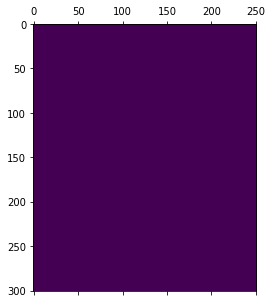

In [ ]:
size = 251  # size of the automata
steps = 300  # time steps
#randomNumber = rand.randint(0, 256)
#print(randomNumber)
#rule = randomNumber  # decimal rule
rule = 90
binary_rule = rule_to_binary(rule)
CA = [wolfram_initialization(size, p=0.25)]  # state in time 0

# Evolve the automata for t steps
for t in range(steps):
    CA += [update_automata(CA[-1], binary_rule)]

plt.matshow(CA)

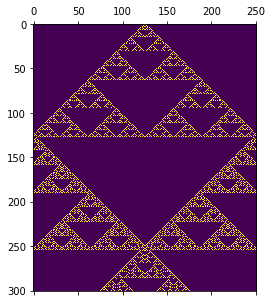

In [ ]:
size = 251  # size of the automata
steps = 300  # time steps
#randomNumber = rand.randint(0, 256)
#print(randomNumber)
#rule = randomNumber  # decimal rule
rule = 90
binary_rule = rule_to_binary(rule)
CA = [wolfram_initialization(size, p=0.5)]  # state in time 0

# Evolve the automata for t steps
for t in range(steps):
    CA += [update_automata(CA[-1], binary_rule)]

plt.matshow(CA)

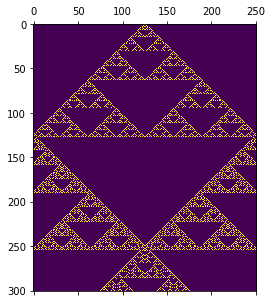

In [ ]:
size = 251  # size of the automata
steps = 300  # time steps
#randomNumber = rand.randint(0, 256)
#print(randomNumber)
#rule = randomNumber  # decimal rule
rule = 90
binary_rule = rule_to_binary(rule)
CA = [wolfram_initialization(size, p=0.75)]  # state in time 0

# Evolve the automata for t steps
for t in range(steps):
    CA += [update_automata(CA[-1], binary_rule)]

plt.matshow(CA)

    Dependiendo del numero de probabilidad de que aparezca un 1, vemos como se genera el automata

* Cierre los bordes del autómata celular.


In [ ]:
def update_automata(CA, binary_rule):
    CAU = CA.copy()  # CAU, state in t+1
    for cell_i in range(1, len(CA)):
        CAU[cell_i] = binary_rule[int(get_neighborhood(CA, cell_i), 2)]

    return CAU

Función Update Automata sin cerrar bordes

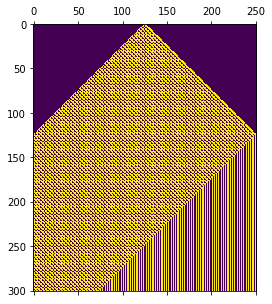

In [ ]:
size = 251  # size of the automata
steps = 300  # time steps
#randomNumber = rand.randint(0, 256)
#print(randomNumber)
#rule = randomNumber  # decimal rule
rule = 214
binary_rule = rule_to_binary(rule)
CA = [wolfram_initialization(size)]  # state in time 0

# Evolve the automata for t steps
for t in range(steps):
    CA += [update_automata(CA[-1], binary_rule)]

plt.matshow(CA)

Funcion Update Automata cerrando bordes

250


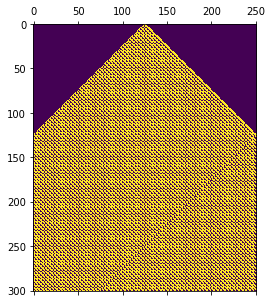

In [ ]:
size = 251  # size of the automata
steps = 300  # time steps
randomNumber = rand.randint(0, 256)
print(randomNumber)
rule = 214  # decimal rule
#rule = rand.randint(0, 256)
binary_rule = rule_to_binary(rule)
CA = [wolfram_initialization(size)]  # state in time 0

# Evolve the automata for t steps
for t in range(steps):
    CA += [update_automata(CA[-1], binary_rule)]

plt.matshow(CA)

* Realice una actualización asíncrona:
 * Implemente alguno de los siguientes esquemas:
    * Random independent scheme - at each time step, a given number of cell is chosen at random with replacement, and updated.
    * The random order scheme - at each time step, all nodes are updated, but in random order.
    * The cyclic scheme - at each time step a node is chosen according to a fixed update order, which was decided at random during initialisation of the model.
 * Vea: https://en.wikipedia.org/wiki/Asynchronous_cellular_automaton    

In [ ]:
def update_automata(CA, binary_rule):
    CAU = CA.copy()  # CAU, state in t+1
    np.random.shuffle(CAU)
    for cell_i in range(1, len(CA)-1):
        CAU[cell_i] = binary_rule[int(get_neighborhood(CA, cell_i), 2)]

    return CAU

Updated cell with normal order

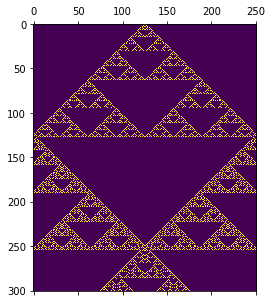

In [ ]:
size = 251  # size of the automata
steps = 300  # time steps
#randomNumber = rand.randint(0, 256)
#print(randomNumber)
#rule = randomNumber  # decimal rule
rule = 90
binary_rule = rule_to_binary(rule)
CA = [wolfram_initialization(size)]  # state in time 0

# Evolve the automata for t steps
for t in range(steps):
    CA += [update_automata(CA[-1], binary_rule)]

plt.matshow(CA)

Updated cell with random order at each step

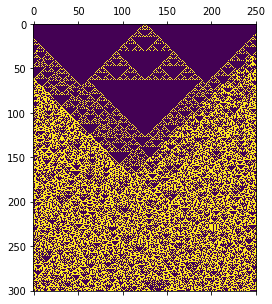

In [ ]:
size = 251  # size of the automata
steps = 300  # time steps
#randomNumber = rand.randint(0, 256)
#print(randomNumber)
#rule = randomNumber  # decimal rule
rule = 90
binary_rule = rule_to_binary(rule)
CA = [wolfram_initialization(size)]  # state in time 0

# Evolve the automata for t steps
for t in range(steps):
    CA += [update_automata(CA[-1], binary_rule)]

plt.matshow(CA)

In [ ]:
binary_rule[0]

print(binary_rule)

01101011
